# 연습문제 (2) 
## 문제 1

|변수|	설명|
|--|--|
|age|	나이|
|sex|성별|
|bmi	|bmi지수(비만도)|
|bp	|평균 혈압|
|s1~s6	|6종류의 혈액검사 수치|
|target|	당뇨병 진행률(종속변수)|

주어진 데이터는 표준화가 적용되어 있다.

이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.



In [1]:
import pandas as pd
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame

from matplotlib import pyplot as plt
import seaborn as sb

import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols ,scailing,get_best_feature


In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


### 주성분 분석
#### 독립변수 종속변수 분리


In [4]:
x_train = df.drop('target',axis=1)
y = df['target']

### PCA 패키지를 사용한 분석

In [5]:
## 주성분 분석의 대상 칼럼수를 독립변수의 전체칼럼의 길이로 설정
model = pca(n_components=len(x_train.columns))

## 주성분 분석 수행

fit = model.fit_transform(x_train)

topfit=fit['topfeat']
topfit

### 좋은 성분만 추출
best_col = list(set(topfit[topfit['type']=="best"]['feature']))
best_col



[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


['bp', 'age', 's1', 's4', 's5', 's6', 'sex']

### 주성분 분석결과를 토대로 회귀분석 수행

In [6]:
ols = my_ols(df,y="target",x=best_col)
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        11:29:50   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
bp           456.9719     68.115      6.709      0.000     323.095     590.849
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
s4           412.2661     84.704      4.867      0.000     245.785     578.747
s5           642.7408     82.452      7.795      0.000     480.686     804.795
s6           150.1445     70.100      2.142      0.033      12.366     287.923
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
ols.table

B    표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                      
target Intercept   152.1335   2.770  0  54.932*  0.000   0.000000
       bp          456.9719  68.115  0   6.709*  0.000   1.468583
       age          -8.6419  64.182  0  -0.135*  0.893   1.217315
       s1         -358.8123  74.225  0  -4.834*  0.000  59.257108
       s4          412.2661  84.704  0   4.867*  0.000   8.893714
       s5          642.7408  82.452  0   7.795*  0.000  10.125073
       s6          150.1445  70.100  0   2.142*  0.033   1.485021
       sex        -290.7876  64.800  0  -4.487*  0.000   1.283075

### 결과 비교하가

In [8]:
실제진행률 = df['target']
실제진행률

## model을 토대로 예측진행
예측진행률 = ols.fit.predict(df[best_col])
예측진행률

## 데이터 프레임으로
result_df = DataFrame({
    "실제진행률":실제진행률,
    "예측진행률":예측진행률
})
result_df

,실제진행률,예측진행률
0,151,172.007474
1,75,82.086360
2,141,147.306696
3,206,172.080542
4,135,145.020055
...,...,...
437,178,186.443274
438,104,98.010573
439,132,125.962704
440,220,195.884545


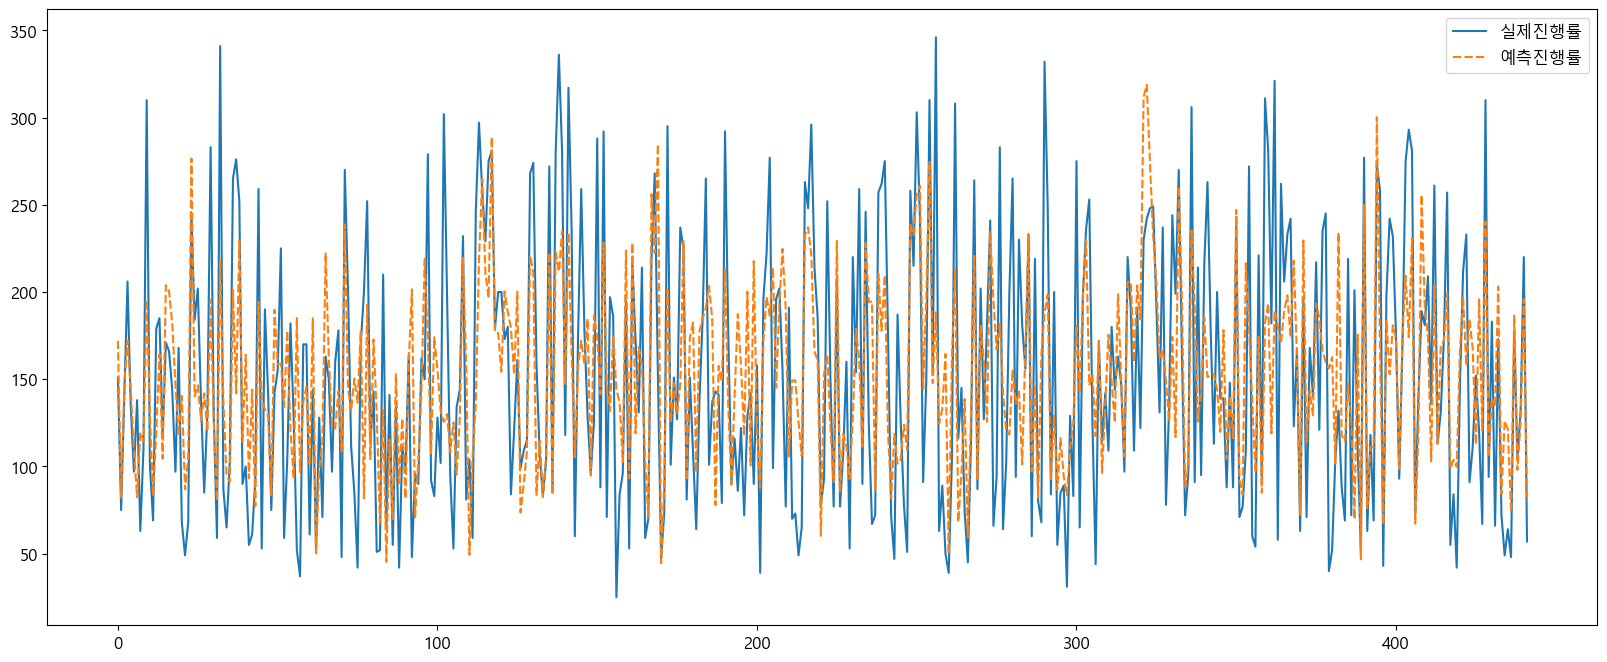

In [9]:

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.unicode_minus"] = False

sb.lineplot(data=result_df.filter(['실제진행률', '예측진행률']))
plt.show()
plt.close()

## 문제2

다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 rent이다. 분석하라


In [10]:
df = pd.read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df


,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


### 데이터 전처리 
#### 독립변수만을 추출

In [11]:
x_train = df.drop('rent',axis=1)
x_train

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


#### 표준화 진행


In [12]:
### 데이터 타입 확인
x_train['borough'].unique()
### 범주형 변수는 표준화 시킬 필요 없음
## neighborhood 별로 영향을 안미칠거같음 
### 필요없는 변수 제거 
x_train = x_train.drop(['neighborhood','borough'],axis=1)
x_train

,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1
3535,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1
3536,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0
3537,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1


In [13]:
### 더미변수는 표준화시킬필요 없음
scaler = StandardScaler()
x_train[['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs']] = scaler.fit_transform(x_train[['bedrooms','bathrooms','size_sqft','min_to_subway','floor','building_age_yrs']])
x_train



,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,-1.397410,-0.611790,-0.962011,0.730862,-0.904097,-0.888763,1,1,0,0,1,1,0,1
1,0.669863,1.056257,2.218694,-0.176116,-0.995343,1.117593,0,0,0,0,0,0,0,0
2,-0.363774,-0.611790,-0.049651,-0.538908,3.566974,-0.584000,0,1,0,1,1,1,0,0
3,-0.363774,-0.611790,0.073811,-0.357512,-0.356619,-0.533206,0,0,0,1,1,1,0,1
4,0.669863,1.056257,8.077886,-0.357512,-0.721604,2.133470,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,-0.363774,-0.611790,-0.853197,-0.357512,-0.356619,-0.914160,1,1,1,1,1,1,0,1
3535,0.669863,1.056257,0.101014,0.005279,-0.174126,-1.091938,1,1,1,1,1,1,0,1
3536,-1.397410,-0.611790,-1.443302,-0.538908,-0.630358,1.117593,0,0,0,0,0,0,0,0
3537,-0.363774,-0.611790,-0.604182,0.186675,-0.630358,-0.964953,1,0,1,1,1,1,0,1


### PCA 패키지를 사용한 분석 

In [14]:
model = pca(n_components=len(x_train.columns))

## 표준화 결과를 활용해서 주성분 분석 수행
fit = model.fit_transform(x_train)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[14]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':       bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
 PC1   0.556504   0.572721   0.579837       0.085528  0.119860   
 PC2  -0.132962  -0.010522  -0.100295       0.349995  0.607640   
 PC3   0.040665  -0.022506  -0.053405       0.902710 -0.398662   
 PC4  -0.024746  -0.116944   0.025155       0.230029  0.618975   
 PC5   0.055580  -0.024048  -0.025088      -0.014110  0.265616   
 PC6   0.780673  -0.582228  -0.186530      -0.030848  0.026607   
 PC7  -0.106010  -0.214145   0.255918       0.027502 -0.003916   
 PC8  -0.211376  -0.519687   0.734585       0.020013 -0.040238   
 PC9   0.036630   0.036506  -0.093804       0.001009  0.030613   
 PC10 -0.020246  -0.007538   0.021281       0.007361  0.001431   
 PC11 -0.008817   0.005655   0.007567      -0.004155 -0.014944   
 PC12  0.003229  -0.017675   0.017539       0.002833 -0.012016   
 PC13 -0.001970   0.005669   0.000970       0.001258 -0.010686   
 PC14  0.007488  -0.020803   0.009745       0.000458 -0.005574  

In [15]:
topfit = fit['topfeat']
best_col=list(set(topfit[topfit['type']=='best']['feature']))
best_col

['bedrooms',
 'has_patio',
 'no_fee',
 'building_age_yrs',
 'size_sqft',
 'has_gym',
 'has_dishwasher',
 'has_elevator',
 'min_to_subway',
 'has_roofdeck',
 'has_washer_dryer']

In [16]:
fit

{'loadings':       bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
 PC1   0.556504   0.572721   0.579837       0.085528  0.119860   
 PC2  -0.132962  -0.010522  -0.100295       0.349995  0.607640   
 PC3   0.040665  -0.022506  -0.053405       0.902710 -0.398662   
 PC4  -0.024746  -0.116944   0.025155       0.230029  0.618975   
 PC5   0.055580  -0.024048  -0.025088      -0.014110  0.265616   
 PC6   0.780673  -0.582228  -0.186530      -0.030848  0.026607   
 PC7  -0.106010  -0.214145   0.255918       0.027502 -0.003916   
 PC8  -0.211376  -0.519687   0.734585       0.020013 -0.040238   
 PC9   0.036630   0.036506  -0.093804       0.001009  0.030613   
 PC10 -0.020246  -0.007538   0.021281       0.007361  0.001431   
 PC11 -0.008817   0.005655   0.007567      -0.004155 -0.014944   
 PC12  0.003229  -0.017675   0.017539       0.002833 -0.012016   
 PC13 -0.001970   0.005669   0.000970       0.001258 -0.010686   
 PC14  0.007488  -0.020803   0.009745       0.000458 -0.005574  

In [17]:
train_df = x_train
train_df['rent'] = df['rent']
ols = my_ols(train_df,y='rent',x=best_col)
ols.summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1004.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:29:57   Log-Likelihood:                -31033.
No. Observations:                3539   AIC:                         6.209e+04
Df Residuals:                    3527   BIC:                         6.216e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5145.9079     41.376    124.368      0.000    5064.784    5227.032
bedrooms          -142.5414     41.428     -3.441      0.001    -223.766     -61.317
has_patio            3.4654    116.938      0.030      0.976    -225.807     232.738
no_fee             -59.1226     56.305     -1.050      0.294    -169.517      51.272
building_age_yrs  -461.8402     27.496    -16.797      0.000    -515.750    -407.931
size_sqft         2827.2995     41.546     68.053      0.000    2745.843    2908.756
has_gym            -16.6640     96.651     -0.172      0.863    -206.162     172.834
has_dishwasher     -47.8870     79.948     -0.599      0.549    -204.636     108.862
has_elevator         0.5239     80.929      0.006      0.995    -158.148     159.196
min_to_subway      -72.3574     26.812     -2.699      0.007    -124.926     -19.788
has_roofdeck        28.9987     91.266      0.318      0.751    -149.940     207.937
has_washer_dryer   148.9107     83.474      1.784      0.075     -14.751     312.573
==============================================================================
Omnibus:                      873.602   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11526.740
Skew:                           0.798   Prob(JB):                         0.00
Kurtosis:                      11.696   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
ols.table

B     표준오차  β         t   유의확률       VIF
종속변수 독립변수                                                              
rent Intercept         5145.9079   41.376  0  124.368*  0.000  0.000000
     bedrooms          -142.5414   41.428  0   -3.441*  0.001  2.712258
     has_patio            3.4654  116.938  0    0.030*  0.976  1.099635
     no_fee             -59.1226   56.305  0   -1.050*  0.294  1.723430
     building_age_yrs  -461.8402   27.496  0  -16.797*  0.000  1.281826
     size_sqft         2827.2995   41.546  0   68.053*  0.000  4.265544
     has_gym            -16.6640   96.651  0   -0.172*  0.863  2.572396
     has_dishwasher     -47.8870   79.948  0   -0.599*  0.549  1.730084
     has_elevator         0.5239   80.929  0    0.006*  0.995  3.601912
     min_to_subway      -72.3574   26.812  0   -2.699*  0.007  1.050386
     has_roofdeck        28.9987   91.266  0    0.318*  0.751  1.894505
     has_washer_dryer   148.9107   83.474  0    1.784*  0.075  1.629325

다중공선정은 10이 넘는게 없어 존재하지 않은거 같지만, 유의확률이 0.05보다 큰게 많음 

0.05보다 높은것은 임대료에 영향을 크게 미치지 않는 변수들임 -> 제거할 필요 있음

### 결과비교하기


In [19]:
실제임대료 = train_df['rent']
예측임대료 = ols.fit.predict(train_df[best_col])
예측임대료
result_df = DataFrame({
    "실제임대료":실제임대료,
    "예측임대료":예측임대료
})
result_df

,실제임대료,예측임대료
0,2550,2888.635428
1,11500,10819.929553
2,4500,5347.726475
3,4795,5614.542621
4,17500,26865.547691
...,...,...
3534,4210,3288.339989
3535,6675,5894.699855
3536,1699,787.294493
3537,3475,3947.465836


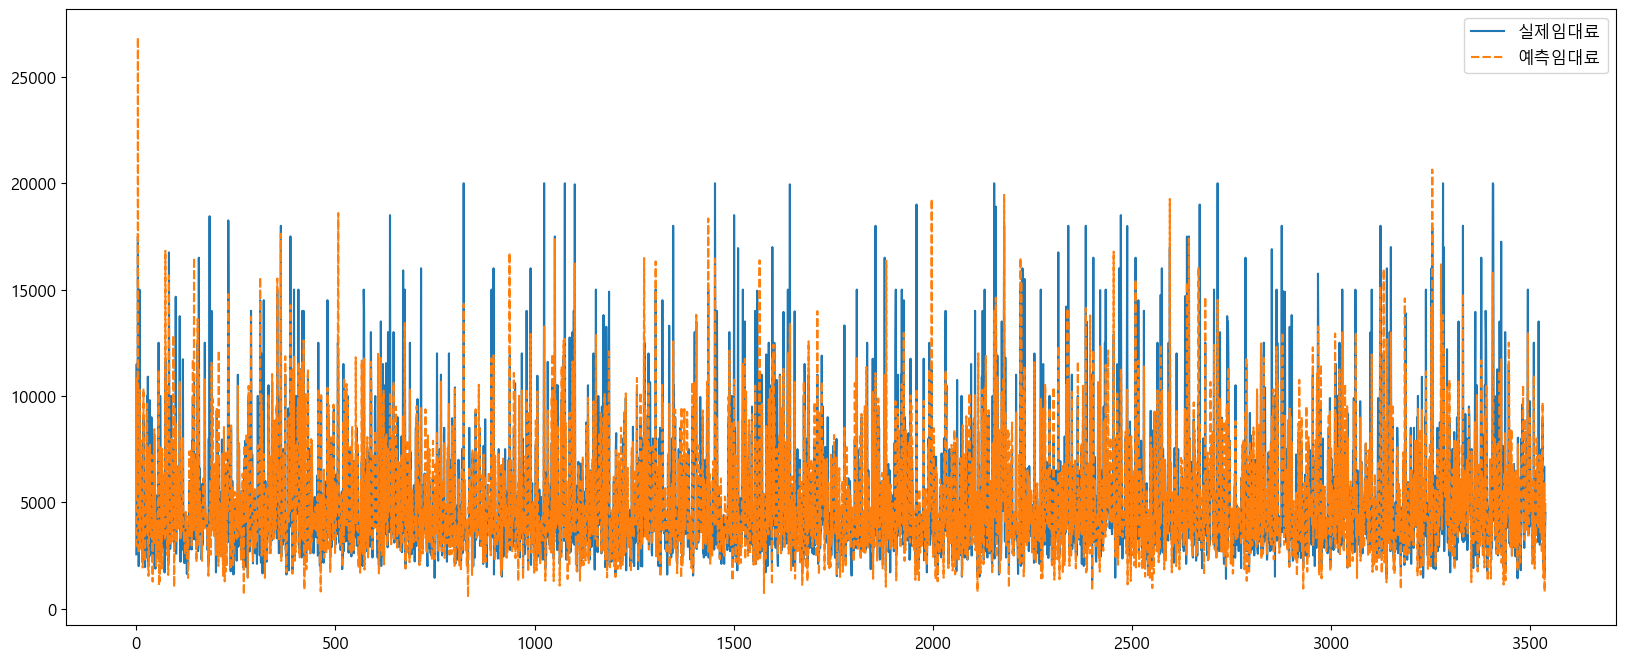

In [20]:

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["axes.unicode_minus"] = False

sb.lineplot(data=result_df.filter(['실제임대료', '예측임대료']))
plt.show()
plt.close()

## 문제(2) 풀이 

In [21]:
df = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


### 변수제거

In [22]:
df2 = df.drop(['neighborhood', 'borough'], axis=1)
df2.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1


데이터 표준화

In [23]:
x_train_std_df , y_train_std_df = scailing(df2,'rent')
y_train_std_df

,rent
0,-0.818669
1,2.011480
2,-0.202044
3,-0.108760
4,3.908786
...,...
3534,-0.293747
3535,0.485729
3536,-1.087770
3537,-0.526167


### 주성분 분석 

In [24]:
feature, topfeat_df = get_best_feature(x_train_std_df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]


[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
